In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind,12)
cov = ind.cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
def msr(riskfree_rate, er, cov):
    """
    RiskFree rate + ER + COV -> W
    """
    n = er.shape[0]
    init_guess = np.repeat (1/n,n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratios, given weights
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r-riskfree_rate)/vol
    
    results = minimize(neg_sharpe_ratio, init_guess, 
                       args = (riskfree_rate, er,cov,), method="SLSQP",
                       options = {'disp': False},
                       constraints=(weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x


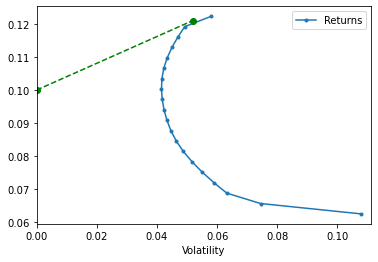

In [12]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# Add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color = "green", marker = "o", linestyle = "dashed")

<AxesSubplot:xlabel='Volatility'>

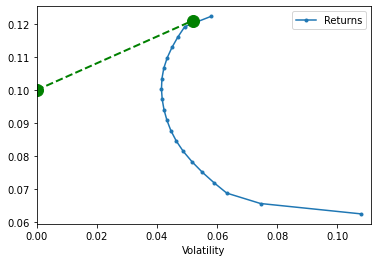

In [13]:
erk.plot_ef(20, er, cov, show_cml= True)

In [14]:
w_msr

array([4.77764119e-16, 1.72296865e-01, 6.64899681e-01, 0.00000000e+00,
       1.26529314e-16, 0.00000000e+00, 1.54376090e-15, 1.62803454e-01,
       2.73438073e-16, 3.86761059e-16, 1.09270539e-16, 2.21088850e-15,
       0.00000000e+00, 1.78268942e-15, 0.00000000e+00, 7.70829069e-16,
       0.00000000e+00, 0.00000000e+00, 1.32532963e-16, 0.00000000e+00,
       0.00000000e+00, 4.79522759e-18, 9.70958130e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.94878354e-16, 4.92722627e-17,
       0.00000000e+00, 0.00000000e+00])